In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cdmin = 0.012
cdjetty = cdmin*400

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in power


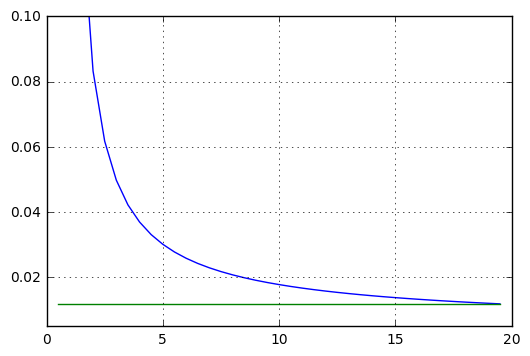

In [4]:
kappa = 0.4
zb = 0.25
z = np.arange(0.5, 20, 0.5)
Cdleft0 = (1/kappa*np.log(z/(2*zb)))**(-2)  #1/2 here is for point half way through grid, so z is full grid thickness
plt.plot(z,Cdleft0)
plt.plot(z,cdmin*np.ones_like(z),'-')
plt.ylim((0.005, 0.10))
#plt.plot(1, cdjetty, 'o')
#plt.plot((0,20), (1.0, 1.0))
plt.grid()
#plt.xlim((0,5))
#plt.ylim((0,1.1))

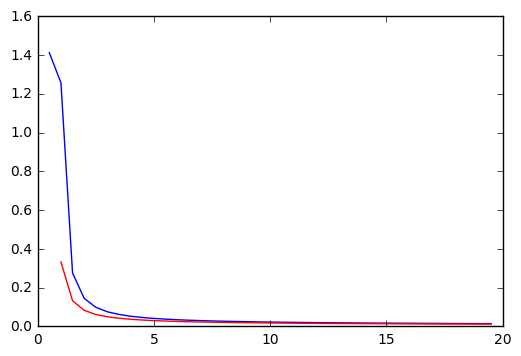

In [5]:
zb = 3.5e-3*100
Cdleft = (1/kappa*np.log(z/(2*zb)))**(-2)
plt.plot(z,Cdleft,'b', z, Cdleft0,'r')

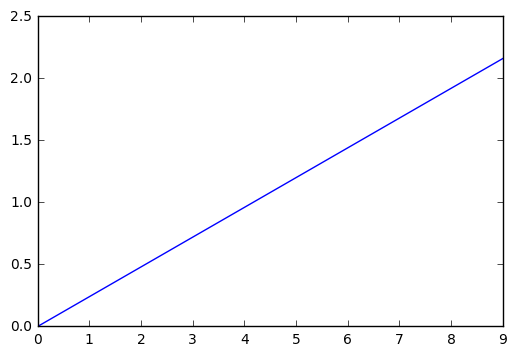

In [6]:
plt.plot(cdjetty*np.arange(0, 2, 0.2)/4.)

In [7]:
u_0 = 1; h = 4
u = u_0 * h / cdjetty / np.arange(1, 15)

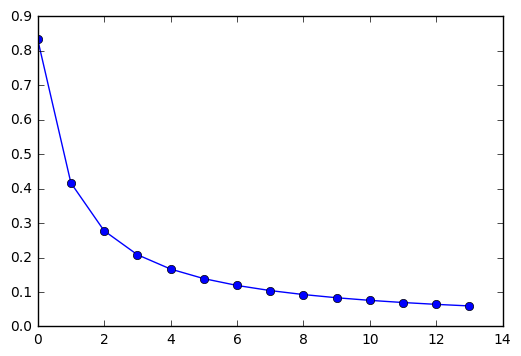

In [8]:
plt.plot(u, 'o-')

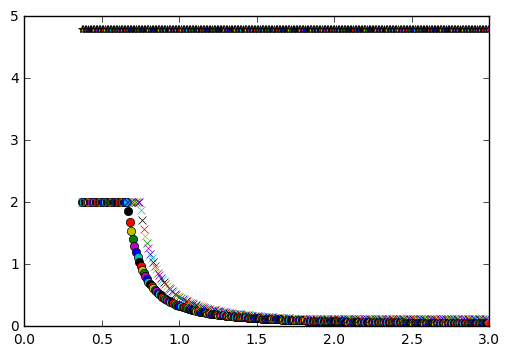

In [13]:
kappa = 0.4
bfri2 = 1.2e-2
bfri2max = 2.
bfrz0 = 0.25
for z in np.arange(0.37, 3.0, 0.01):
    if (z > 2*bfrz0):
        CDlog = (kappa/np.log(0.5*z/bfrz0))**2
        CD = min(max(bfri2, CDlog), bfri2max)
    else:
        CD = bfri2max
    if (z > 2*0.28):
        CDlog_o = (kappa/np.log(0.5*z/0.28))**2
        CD_o = min(max(0.125, CDlog_o), bfri2max)
    else:
        CD_o = bfri2max
    plt.plot(z, CD, 'o')
    plt.plot(z, CD_o, 'x-')
    plt.plot(z, bfri2*400, '*')

* So need to set bfri2max to 2, and leave enhancement for jetty at 400
* Run no jetty case: look at mud flats region
* Run tide case with new bottom friction

what to do u2+v2 for jetty: because I'm going to do it by grid point.  No problem, should be fine.  But I will need two bfrcoef2d.  It is completely contained in zdfbfr.F90